In [1]:
# display, transform, read, split ...
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

from tensorflow.python.client import device_lib
# GPU 사용
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
# CPU 사용
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# # CPU, GPU 사용 가능 여부 print
# print(device_lib.list_local_devices())

2025-03-25 15:31:56.867846: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-25 15:31:56.892146: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-25 15:31:56.892174: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-25 15:31:56.892870: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-25 15:31:56.897772: I tensorflow/core/platform/cpu_feature_guar

### model load


In [2]:
model = tf.keras.models.load_model('/home/juha/Desktop/S12P21C201/src/AI/model')
model.summary()


2025-03-25 15:32:21.099782: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-03-25 15:32:21.099806: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: juha
2025-03-25 15:32:21.099810: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: juha
2025-03-25 15:32:21.099920: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: 535.230.2
2025-03-25 15:32:21.099928: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: 535.230.2
2025-03-25 15:32:21.099930: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:241] kernel version seems to match DSO: 535.230.2


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

### 테스트 이미지 불러오기

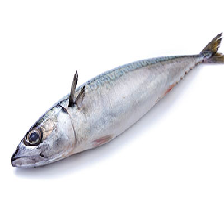

In [3]:
test1_img = tf.keras.preprocessing.image.load_img('/home/juha/Desktop/S12P21C201/src/187.jpg', 
                                            target_size=(224, 224))
img1_array = tf.keras.preprocessing.image.img_to_array(test1_img)
img1_array = np.array([img1_array]) 
img1_array = preprocess_input(img1_array)
test1_img

In [4]:
class_names = ['감성돔', '벵에돔', '참돔', '복섬', '문어', '돌돔', '주꾸미', '성대', '문절망둑', '갑오징어', '노래미', '독가시치', '전갱이', '망상어', '고등어', '무늬오징어', '볼락', '광어', '우럭', '붕장어', '갈치', '양태', '숭어', '삼치', '학공치', '농어']


# generate predictions for samples
predictions = model.predict(img1_array)
print(predictions)

# generate argmax for predictions
class_id = np.argmax(predictions, axis = 1)
print(class_id)

# transform classes number into classes name|
print("모델 예측: ", class_names[class_id.item()])


1/1 [==============================] - 1s 518ms/step
[[9.2091854e-05 7.6072116e-05 1.6230564e-05 8.4975691e-05 1.4662353e-05
  1.4264704e-04 2.1558390e-05 2.9025758e-05 4.0627483e-06 3.7456957e-05
  8.7745201e-07 3.8420811e-05 1.4547536e-03 1.0256239e-05 9.1770905e-01
  5.0254635e-06 4.3904140e-07 2.6058440e-06 2.0448639e-05 1.0834628e-05
  3.1277345e-04 4.1933039e-05 4.8839330e-04 7.8726046e-02 6.1678822e-04
  4.2573327e-05]]
[14]
모델 예측:  고등어


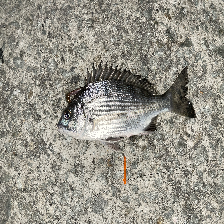

In [13]:
test2_img = tf.keras.preprocessing.image.load_img('/home/juha/Desktop/S12P21C201/src/AI/testdata/44C0E404-2C24-4CEF-89A8-1C8A19E43415.jpg', 
                                            target_size=(224, 224))
img2_array = tf.keras.preprocessing.image.img_to_array(test2_img)
img2_array = np.array([img2_array])
img2_array = preprocess_input(img2_array)
test2_img

In [14]:

# generate predictions for samples
predictions = model.predict(img2_array)
print("Class id 별 확률: \n",predictions)

# generate argmax for predictions
class_id = np.argmax(predictions, axis = 1)
print("Class id: ", class_id)

# transform classes number into classes name
print("모델 예측: ", class_names[class_id.item()])

1/1 [==============================] - 0s 15ms/step
Class id 별 확률: 
 [[2.5609672e-01 8.1598153e-03 9.9068424e-03 3.3746536e-03 2.0355987e-03
  2.0182114e-03 6.1835913e-04 3.8673551e-04 1.2789577e-03 1.7438994e-03
  1.0350034e-01 4.1440642e-01 8.6456081e-03 1.5553916e-01 4.3299250e-04
  1.0844696e-02 6.8227953e-04 9.0736413e-04 3.7953435e-03 5.4269610e-04
  6.9478549e-05 2.5882833e-03 1.2519057e-03 7.2641618e-04 1.1583762e-04
  1.0331382e-02]]
Class id:  [11]
모델 예측:  독가시치
